step one
First few rows of the dataset:
                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  

step two


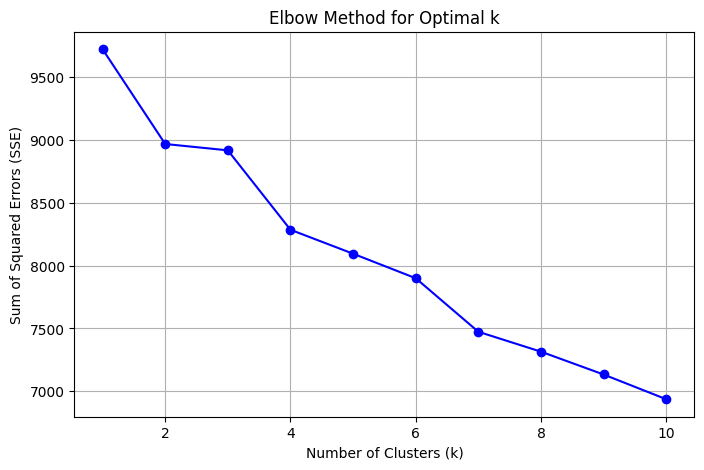


step three


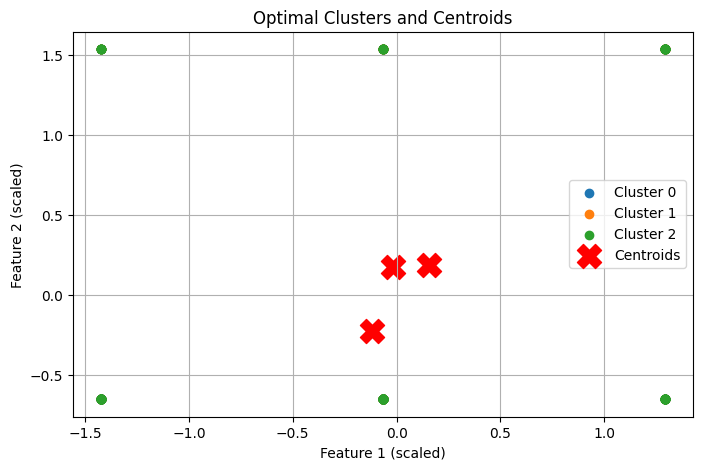

'\nExplanation:\nThis plot shows how the data points are divided into three clusters (assuming k=3 is the optimal number based on the elbow method). Each cluster is represented by a different color, making it easy to see how the points are grouped.\nCentroids: The red X markers represent the centroids of each cluster. These centroids are essentially the "mean" positions of the points within each cluster. The k-means algorithm uses these centroids to assign each data point to the closest cluster.\nWhy is this helpful? By visualizing the clusters and their centroids, we can understand the structure of the data and verify that the clustering makes sense. It helps us see which data points are similar (grouped together) and how the groups differ from one another.\n\n'

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print('step one')
# Loading the Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"
column_names = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
data = pd.read_csv(url, header=None, names=column_names)

# Checking the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Encoding categorical variables and handle missing values
data = pd.get_dummies(data, drop_first=True)
data = data.fillna(data.mean())

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



print()
print('step two')
# Calculating SSE for k values from 1 to 10
sse = []  
k_values = range(1, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  
    sse.append(kmeans.inertia_) 
    
# Plotting SSE vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

'''
Explanation:
The elbow method is like finding the sweet spot for the number of clusters (k) to divide the data.We start by calculating the Sum of Squared Errors (SSE) for different 
k values.The SSE represents how tightly the data points in a cluster are packed around their centroid.As 
k increases, the SSE naturally decreases because more clusters mean fewer data points per cluster, leading to smaller distances. However, beyond a certain 
k, the improvement slows down significantly—this is where the "elbow" appears in the graph.For example, if the plot flattens out around 
k=3, it means adding more clusters isn’t making the data significantly better grouped. So, k=3 would be the optimal number of clusters.

'''


print()
print('step three')
# Optimal number of clusters (assume it's 3 from the elbow method)
optimal_k = 3

# Fitting KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)  # scaled_data is the preprocessed dataset

# Adding the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_ 

# Plotting the clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    cluster_points = scaled_data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}'
    )

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300,
    c='red',
    marker='X',
    label='Centroids',
)

plt.title('Optimal Clusters and Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.grid(True)
plt.show()


'''
Explanation:
This plot shows how the data points are divided into three clusters (assuming k=3 is the optimal number based on the elbow method). Each cluster is represented by a different color, making it easy to see how the points are grouped.
Centroids: The red X markers represent the centroids of each cluster. These centroids are essentially the "mean" positions of the points within each cluster. The k-means algorithm uses these centroids to assign each data point to the closest cluster.
Why is this helpful? By visualizing the clusters and their centroids, we can understand the structure of the data and verify that the clustering makes sense. It helps us see which data points are similar (grouped together) and how the groups differ from one another.

'''

